In [1]:
# Project Goal: Create an open source which could provide simulation data and use Anchor to validate the model

# Details:
# 1. Components

# 2. Data Table:
# For example: clothes
# -> Product: product id, price, color, size, amount   
# -> Inventory: shop id, product id, amount, 
# -> customer: age, membership, product id
# -> promotion/discount: rate, product id, expiration date
# -> session

# Data Model
# Find the initial Model for the data table (Joint distribution)
# Consider the relationship between tables
# Decide what distributions they would be.

# 3. Be simulate 
# -> Data Table (Could be demonstrated)
# -> graphical model

# 4. Anchor 

In [37]:
# Bullet through approach

# Build n products table with one feature(category): clothes, shoes, computers
# Assume the average price of clothes would be 100, the average price of shoes would be 200, and the average price of computer would be 4000

Product.Table <- function(n_product, alpha = 2, beta = 5, clothes_price_scaling_factor= 100, shoes_price_scaling_factor = 200, computer_price_scaling_factor = 4000){
  
  set.seed(12345)
  
  category <- sample(1:3,n_product,replace=TRUE) # 3 = clothes, 2 = shoes, 1 = computer
  p.id <- 1:n_product
  # Assume the price will follow a beta distribution with alpha = 2, beta = 5
  clothes.price <- clothes_price_scaling_factor * rbeta(table(category)[[3]], shape1 = alpha , shape2 = beta)
  shoes.price <- shoes_price_scaling_factor * rbeta(table(category)[[2]], shape1 = alpha, shape2 = beta)
  computer.price <- computer_price_scaling_factor * rbeta(table(category)[[1]], shape1 = alpha, shape2 = beta)
  
  # Build the data frame with the product_id column and the price column
  price <- ifelse(category == 3, clothes.price, ifelse(category == 2, shoes.price, computer.price))
  product <- as.data.frame(cbind(p.id, category, price))
  product$category <- as.factor(product$category)    
  
  # Return the whole product table
  return(product)
}

# Build 1000 products table with three categories: clothes, shoes, computers
Product.Table(n = 1000)  

p.id,category,price
1,3,7.942982
2,3,1.788077
3,3,39.377804
4,3,13.219627
5,2,57.627238
6,1,788.556183
7,1,2607.861722
8,2,56.109517
9,3,24.081814
10,3,3.747159


In [38]:
# Build n customers table with one features: gender(male and female)

Customer.Table <- function(n_customer, p.gender = 0.5){
  
  set.seed(12345)
  # Assume gender would follow the binomial distribution with the probability = 0.5
  gender <- rbinom(n_customer, 1, p.gender) # 1 means male and 0 means female
  c.id <- 1:n_customer
  
  # Build the data frame with customer_id and gender
  customer <- as.data.frame(cbind(c.id, gender))
  customer$gender <- as.factor(customer$gender)
  
  # Return the whole customer table
  return(customer)
  
}

# Build 1000 customers table with one features: gender(male and female)
Customer.Table(1000)


c.id,gender
1,1
2,1
3,1
4,1
5,0
6,0
7,0
8,1
9,1
10,1


In [39]:
# 3. Simulate the sessions data

# Build the table with n sessions recording the following columns: customer id, number of products, and purchasing history (each product id and buy the product or not)

# The feature: Number of products which each customer would see would follow the uniform distribution with minimum product = 1 and the maximum product = 100)
# Assumptions: 1. The products each customer view are independent.
#              2. We sample customers with replacement and sample products with replacement.    

# Record the n customers' shopping history. 
# This table would use the previous two table: the customer table and the product table. 

Sessions.Table <- function(n_sessions, n_customer, n_product){
  
  # Call the previous functions to gain the two table.
  customer <- Customer.Table(n_customer = n_customer)
  product <- Product.Table(n_product = n_product)
  
  # Build the matrix to store the sessions
  # Assume the maximum products each customer view is 100.
  sessions <- matrix(NA, nrow = n_sessions, ncol = 202)
  colnames(sessions) <- c("customer.id", "number of product", rep(c("product.id", "buy"), times = 100))
  
  for (i in 1:n_sessions){
    
    # Select one customer
    c.index <- sample(1:n_customer,1,replace=T) 
    # Check the customer's id
    sessions[i, 1] <- customer[c.index, 1] 
    #sessions2[i, 1] <- customer[c.index, 1]
    # Check the customer is male or not 
    male <- ifelse(customer[c.index, 2] == 1, 1, 0) 
    
    # Decide number of products which the customer views
    views <- sample(1:100,1,replace=T) 
    sessions[i, 2] <- views
    #sessions2[i, 2] <- views
    
    for (j in 1:views){
      
      # Select one product
      p.index <- sample(1:n_product,1,replace=T) 
      sessions[i, 2*j+1] <- product[p.index, 1] 
      #sessions2[i, 2*j+1] <- product[p.index, 1] 
      
      # Check the product's category and price
      if (product[p.index,2] == 1){ 
        category1 <- 1
        category2 <- 0
        category3 <- 0
        price <- product[p.index, 3]
      } else if (product[p.index,2] == 2){
        category1 <- 0
        category2 <- 1
        category3 <- 0
        price <- product[p.index, 3]
      } else {
        category1 <- 0
        category2 <- 0
        category3 <- 1
        price <- product[p.index, 3]
      } 
      
      # We use logistic function to calculate the probability of buying the product
      # log(p/1-p) = alpha0 + alpha11*male*category1 + alpha12*male*category2 + alpha13*male*category3 +
      #              [alpha21*price+ alpha31*price^2]*category1 + [alpha22*price+ alpha32*price^2]*category2
      #              + [alpha23*price+ alpha33*price^2]*category3
      
      # For all the parameters setting, the below are our assumptions.
      # 1. Assume the customer has 10% probiblity to buy something. alpha0 = log(0.1/1-0.1)
      
      alpha0 = log(0.1/0.9)
      
      # 2. Assume the probability of male buing computer is larger than the probability of male buying clothes or shoes.
      #    alpha11 = 1, alpha12 = -1, alpha13 = -1 
      
      alpha11 = 1
      alpha12 = -1
      alpha13 = -1
      
      
      # 3. Assume the relationship between price and category would follow the Polynomial function. f(x) = ax^2 + bx 
      
      #    For computer. The price = 4000, there still be 1 amount sold. The price = 8000, nothing is sold.
      
      a1 <- matrix(c(64000000, 16000000, 8000, 4000), nrow = 2)
      b1 <- c(0,1)
      alpha21 <- solve(a1, b1)[1]
      alpha31 <- solve(a1, b1)[2]
      
      #    For shoes. The price = 200, there still be 10 amount sold. The price = 400, nothing is sold.
      
      a2 <- matrix(c(160000, 40000, 400, 200), nrow = 2)
      b2 <- c(0, 10)
      alpha22 <- solve(a2, b2)[1]
      alpha32 <- solve(a2, b2)[2]
      
      #    For clothes. The price = 100, there still be 10 amount sold. The price = 200, nothing is sold.
      
      a3 <- matrix(c(40000, 10000, 200, 100), nrow = 2)
      b3 <- c(0, 10)    
      alpha23 <- solve(a3, b3)[1]
      alpha33 <- solve(a3, b3)[2]
      
      # Use the logist function  
      bx <- alpha0 + alpha11*male*category1 + alpha12*male*category2 + alpha13*male*category3 + (alpha21*price+ alpha31*price^2)*category1 + (alpha22*price+ alpha32*price^2)*category2 + (alpha23*price+ alpha33*price^2)*category3
      # The probability of buying product
      p <- 1/(1+exp(-bx)) 
      
      # Decide the customer will buy or not   
      sessions[i, 2*j+2] <- ifelse(p > 0.5, 1, 0) 
      
      
    }
  }
  
  return(sessions)
}

# Build 1000 sessions by sampling 1000 customers with replacement which sampling 1000 products replacement
Sessions.Table(n_sessions = 1000, n_product = 1000, n_customer = 1000)

customer.id,number of product,product.id,buy,product.id,buy,product.id,buy,product.id,buy,...,product.id,buy,product.id,buy,product.id,buy,product.id,buy,product.id,buy
583,16,588,1,775,1,152,1,235,1,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
968,16,788,1,920,1,497,1,832,1,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
645,14,178,1,52,1,11,1,150,1,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
368,81,470,1,521,1,242,1,603,1,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
196,26,470,1,404,1,531,1,208,1,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
893,17,514,1,705,1,290,1,766,1,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
757,46,48,1,450,1,792,1,238,1,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
665,7,571,1,276,1,544,1,520,1,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
246,72,679,1,583,1,85,1,377,1,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
13,54,57,1,921,1,604,1,127,1,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [40]:
# Since the original formula would give high probability to buy products, 
# we give f0 and beta0 to adjust the formula to make the probabilities of buying would be close to 10%.

Sessions.Table.Adjust <- function(n_sessions, n_customer, n_product){
  
  # Call the previous functions to gain the two table.
  customer <- Customer.Table(n_customer = n_customer)
  product <- Product.Table(n_product = n_product)
  
  # Build the matrix to store the sessions
  # Assume the maximum products each customer view is 100.
  sessions <- matrix(NA, nrow = n_sessions, ncol = 202)
  colnames(sessions) <- c("customer.id", "number of product", rep(c("product.id", "buy"), times = 100))
  
  for (i in 1:n_sessions){
    
    # Select one customer
    c.index <- sample(1:n_customer,1,replace=T) 
    # Check the customer's id
    sessions[i, 1] <- customer[c.index, 1] 
    # Check the customer is male or not 
    male <- ifelse(customer[c.index, 2] == 1, 1, 0) 
    
    # Decide number of products which the customer views
    views <- sample(1:100,1,replace=T) 
    sessions[i, 2] <- views
    
    for (j in 1:views){
      
      # Select one product
      p.index <- sample(1:n_product,1,replace=T) 
      sessions[i, 2*j+1] <- product[p.index, 1] 
      
      # Check the product's category and price
      if (product[p.index,2] == 1){ 
        category1 <- 1
        category2 <- 0
        category3 <- 0
        price <- product[p.index, 3]
      } else if (product[p.index,2] == 2){
        category1 <- 0
        category2 <- 1
        category3 <- 0
        price <- product[p.index, 3]
      } else {
        category1 <- 0
        category2 <- 0
        category3 <- 1
        price <- product[p.index, 3]
      } 
      
      # We use logistic function to calculate the probability of buying the product
      # log(p/1-p) = alpha0 + alpha11*male*category1 + alpha12*male*category2 + alpha13*male*category3 +
      #              [alpha21*price+ alpha31*price^2]*category1 + [alpha22*price+ alpha32*price^2]*category2
      #              + [alpha23*price+ alpha33*price^2]*category3
      
      # For all the parameters setting, the below are our assumptions.
      # 1. Assume the customer has 10% probiblity to buy something. alpha0 = log(0.1/1-0.1)
      
      alpha0 = log(0.1/0.9)
      
      # 2. Assume the probability of male buing computer is larger than the probability of male buying clothes or shoes.
      #    alpha11 = 1, alpha12 = -1, alpha13 = -1 
      
      alpha11 = 1
      alpha12 = -1
      alpha13 = -1
      
      
      # 3. Assume the relationship between price and category would follow the Polynomial function. f(x) = ax^2 + bx 
      
      #    For computer. The price = 4000, there still be 1 amount sold. The price = 8000, nothing is sold.
      
      a1 <- matrix(c(64000000, 16000000, 8000, 4000), nrow = 2)
      b1 <- c(0,1)
      alpha21 <- solve(a1, b1)[1]
      alpha31 <- solve(a1, b1)[2]
      
      #    For shoes. The price = 200, there still be 10 amount sold. The price = 400, nothing is sold.
      
      a2 <- matrix(c(160000, 40000, 400, 200), nrow = 2)
      b2 <- c(0, 10)
      alpha22 <- solve(a2, b2)[1]
      alpha32 <- solve(a2, b2)[2]
      
      #    For clothes. The price = 100, there still be 10 amount sold. The price = 200, nothing is sold.
      
      a3 <- matrix(c(40000, 10000, 200, 100), nrow = 2)
      b3 <- c(0, 10)    
      alpha23 <- solve(a3, b3)[1]
      alpha33 <- solve(a3, b3)[2]
      
      bx <- alpha0 + alpha11*male*category1 + alpha12*male*category2 + alpha13*male*category3 + (alpha21*price+ alpha31*price^2)*category1 + (alpha22*price+ alpha32*price^2)*category2 + (alpha23*price+ alpha33*price^2)*category3
      
      # Give hyper-parameter (f-f0)/beta0 to adjuct the probability since the original probabilities are too high.
      # We want to keep the probability close to 10%
      p_beta <- 1/(1+exp(-(bx-800)/0.1))
      
      sessions[i, 2*j+2] <- ifelse(p_beta > 0.5, 1, 0) # Decide the customer will buy or not
      
    }
  }
  
  return(sessions)
}

# Build the table with 1000 sessions which we already adjust the probabilities.
Sessions.Table.Adjust(n_sessions = 1000, n_customer = 1000, n_product = 1000)

customer.id,number of product,product.id,buy,product.id,buy,product.id,buy,product.id,buy,...,product.id,buy,product.id,buy,product.id,buy,product.id,buy,product.id,buy
583,16,588,0,775,0,152,0,235,0,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
968,16,788,1,920,0,497,0,832,0,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
645,14,178,0,52,0,11,0,150,0,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
368,81,470,1,521,0,242,0,603,0,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
196,26,470,1,404,0,531,1,208,0,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
893,17,514,0,705,1,290,0,766,0,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
757,46,48,0,450,0,792,0,238,0,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
665,7,571,0,276,0,544,0,520,0,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
246,72,679,0,583,1,85,0,377,0,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
13,54,57,0,921,0,604,0,127,0,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


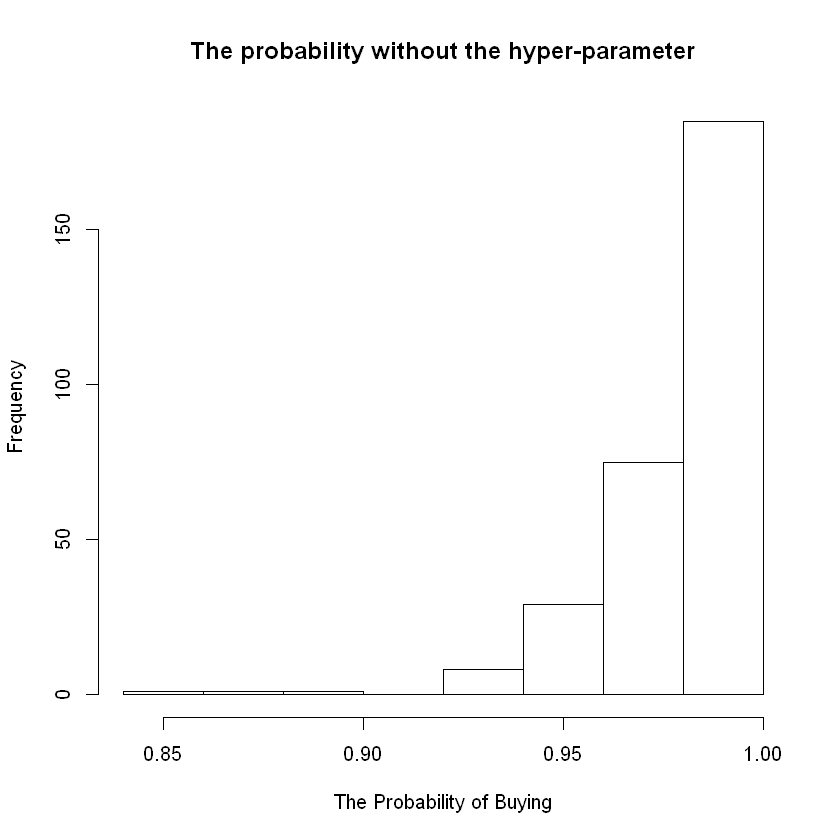

customer_id,view,buy,buy_adjust
2546,39,39,9
3454,3,3,1
260,56,55,10
3441,76,75,19
3129,55,54,9
8407,74,74,17
9444,73,70,16
3590,99,97,16
281,21,21,4
776,96,93,16


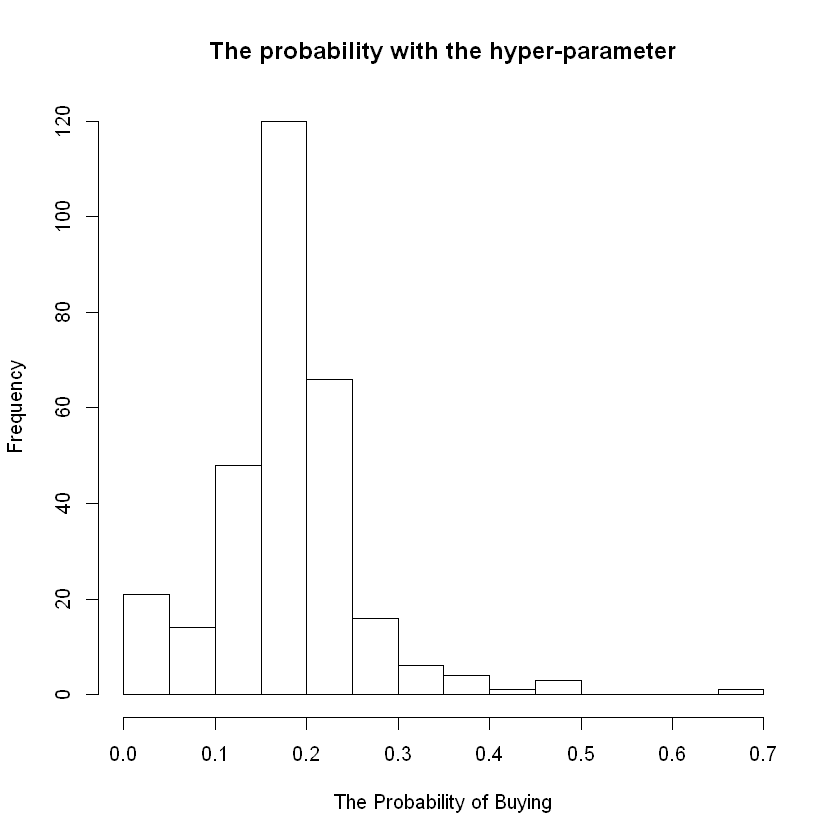

In [41]:
# Summary of number of products each customer view and buy with histograms of the probability of buying

Summary.Probability <- function(n_sessions, n_customer, n_product){
  
  sessions <- Sessions.Table(n_sessions = n_sessions, n_customer = n_customer, n_product = n_product)
  sessions2 <- Sessions.Table.Adjust(n_sessions = n_sessions, n_customer = n_customer, n_product = n_product)
  
  # Build the data frame to contain the two sessions' summary data
  TableOfSummary <- matrix(NA, nrow = n_sessions, ncol = 4)
  colnames(TableOfSummary) <- c("customer_id", "view", "buy","buy_adjust")
  
  # To sum up all products each customer bought in each session
  
  for (i in 1:n_sessions) {
    TableOfSummary[i, 3] <- sum(sessions[i, seq(4, 202, 2)], na.rm = TRUE)
    TableOfSummary[i, 4] <- sum(sessions2[i, seq(4, 202, 2)], na.rm = TRUE)
  }
  
  # Store the customer_id and number of product each customer view
  TableOfSummary[1:n_sessions, 1:2] <- sessions[1:n_sessions,1:2]
  TableOfSummary <- as.data.frame(TableOfSummary)
  
  # Plot the histogram of the probabilities with and without hyper-parameters
  
  hist(TableOfSummary[,3]/TableOfSummary[,2], main = "The probability without the hyper-parameter", xlab = "The Probability of Buying")
  hist(TableOfSummary[,4]/TableOfSummary[,2], main = "The probability with the hyper-parameter", xlab = "The Probability of Buying")
  
  return(TableOfSummary)
}

# Bulid the summary table of the two different sessions and show the histogram
Summary.Probability(n_sessions = 300, n_product = 500, n_customer = 10000)

In [42]:
# Transform the data into aggregate data form

Aggregate.Form <- function(n_customer, n_sessions, n_product){
  
  # Call the previous functions we need 
  
  sessions2 <- Sessions.Table.Adjust(n_sessions = n_sessions, n_product = n_product, n_customer = n_customer)
  customer <- Customer.Table(n_customer = n_customer)
  
  # Transform the first session data into new form
  
  for (i in 1:1){
    
    # Transform the new table
    
    Product <- sessions2[i, seq(3, 201, 2)]
    Product <- Product[is.na(Product) == FALSE]
    
    Bought <- sessions2[i, seq(4, 202, 2)]
    Bought <- Bought[is.na(Bought) == FALSE]
    
    Customer <- rep(sessions2[i,1], times = length(Product))
    Gender <- rep(customer[sessions2[i,1],2], times = length(Product))
    Viewed <- rep(1, times = length(Product))
    Session <- rep(i, times = length(Product))
    
    new <- cbind(Customer, Product, Gender, Viewed, Bought, Session)
    new <- new[order(new[,2]),]
    row.names(new) <- NULL
    new <- as.data.frame(new)
    
    # Check if the product is duplicated
    unit <- unique(new$Product)
    if (length(unit) != length(new$Product)){
      
      new <- cbind(tapply(new$Viewed, new$Product, sum), tapply(new$Bought, new$Product, sum))
      Product <- as.integer(row.names(new))
      Customer <- rep(sessions2[i,1], times = length(unit))
      Gender <- rep(customer[sessions2[i,1],2], times = length(unit))
      Session <- rep(i, times = length(unit))
      new <- cbind(Customer, Product, Gender, new, Session)
      row.names(new) <- NULL
      colnames(new) <- c("Customer", "Product", "Gender", "Viewed", "Bought", "Session")
      new <- as.data.frame(new)
      
    } 
    
  }
  
  # Transform the remaining sessions into the new form
  
  for (i in 2:n_sessions){
    
    # Transform the new table
    
    Product <- sessions2[i, seq(3, 201, 2)]
    Product <- Product[is.na(Product) == FALSE]
    
    Bought <- sessions2[i, seq(4, 202, 2)]
    Bought <- Bought[is.na(Bought) == FALSE]
    
    Customer <- rep(sessions2[i,1], times = length(Product))
    Gender <- rep(customer[sessions2[i,1],2], times = length(Product))
    Viewed <- rep(1, times = length(Product))
    Session <- rep(i, times = length(Product))
    
    new2 <- cbind(Customer, Product, Gender, Viewed, Bought, Session)
    row.names(new2) <- NULL
    
    if (length(new2[,2]) > 1){
      new2 <- new2[order(new2[,2]),]
      
    }
    new2 <- as.data.frame(new2)
    
    # Check if the product is duplicated
    unit <- unique(new2$Product)
    
    if (length(unit) != length(new2$Product)){
      
      new2 <- cbind(tapply(new2$Viewed, new2$Product, sum), tapply(new2$Bought, new2$Product, sum))
      Product <- as.integer(row.names(new2))
      Customer <- rep(sessions2[i,1], times = length(unit))
      Gender <- rep(customer[sessions2[i,1],2], times = length(unit))
      Session <- rep(i, times = length(unit))
      new2 <- cbind(Customer, Product, Gender, new2, Session)
      row.names(new2) <- NULL
      colnames(new2) <- c("Customer", "Product", "Gender", "Viewed", "Bought", "Session")
      new2 <- as.data.frame(new2)
      
    } 
    
    new <- rbind(new, new2)
    
  }
  
  # Sort the data by Customer_id and product_id
  new <- new[order(new$Customer, new$Product),]
  
  # Change the label of gender into letters
  new$Gender <- ifelse(new$Gender == 1, "F", "M")
  
  return(new)
  
}

# Build the aggregate data frame with 1000 sessions.
Aggregate.Form(n_sessions = 1000, n_product = 5000, n_customer = 1000)

,Customer,Product,Gender,Viewed,Bought,Session
1597,2,42,M,1,0,39
1598,2,352,M,1,0,39
1599,2,586,M,1,0,39
1600,2,596,M,1,0,39
1601,2,639,M,1,0,39
1602,2,800,M,1,0,39
1603,2,1008,M,1,0,39
1604,2,1261,M,1,0,39
1605,2,1895,M,1,1,39
1606,2,2551,M,1,0,39
